# U-Net

In [1]:
%load_ext autoreload
%autoreload

In [2]:
from deeply.model.unet import (
    UNet,
    AttentionUNet,
    Trainer,
    generate_toy
)
from deeply.plots import segplot, history as history_plot

In [3]:
width, height = (200, 200)

In [4]:
train, val, test = generate_toy(x = width, y = height)

2021-09-02 18:53:33.554955: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Generate Samples

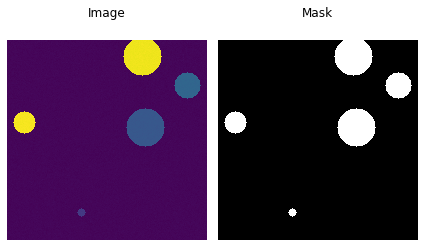

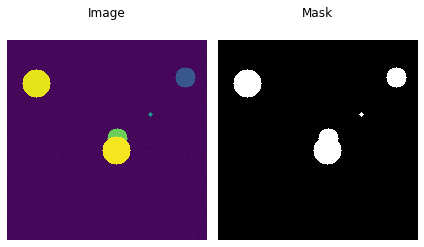

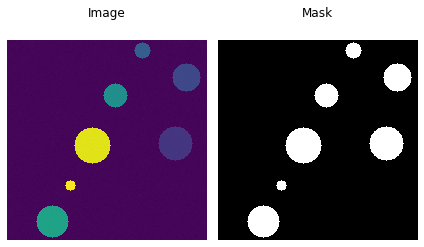

In [5]:
n_samples = 3
samples   = train.take(n_samples)

for image, mask in samples:
    segplot(image, mask)

In [8]:
unet = UNet(x = width, y = height, n_classes = 1, layer_depth = 2, init_filters = 16, final_activation = "sigmoid", batch_norm = False)

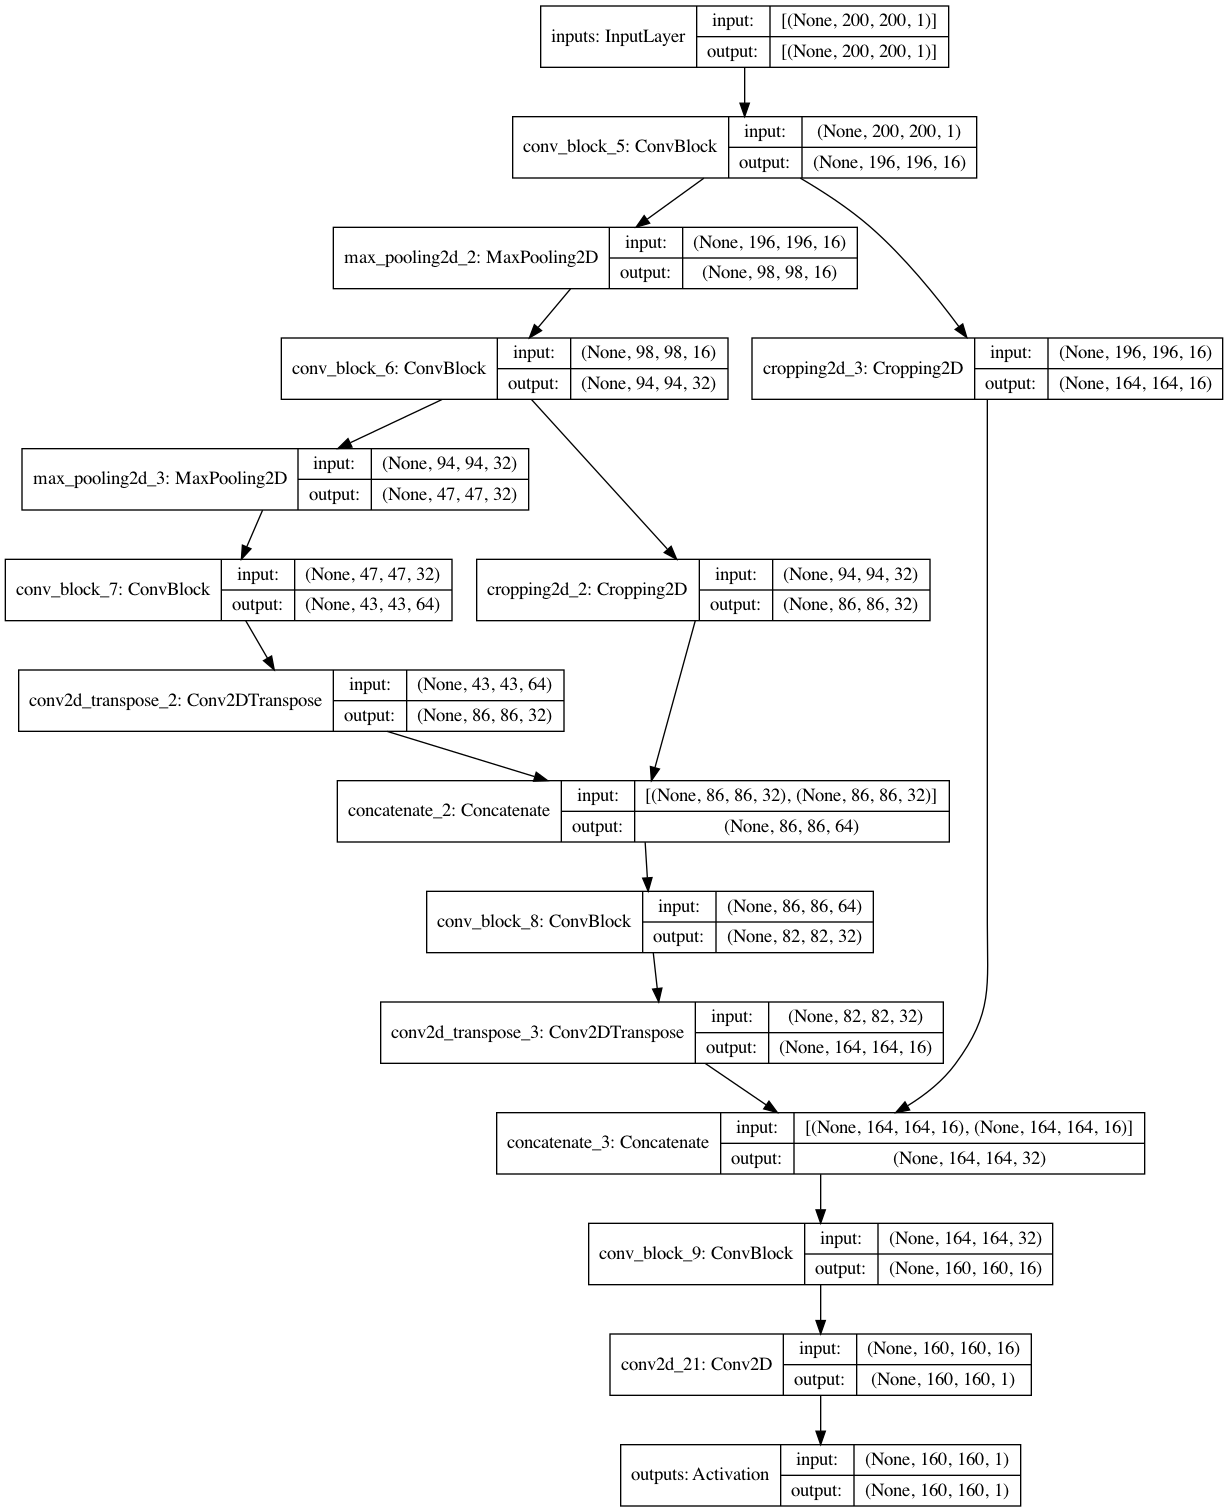

In [9]:
unet.plot(show_shapes = True)

In [10]:
unet.compile(optimizer = "adam")

In [11]:
batch_size = 1
epochs     = 1

Begin Training...


2021-09-02 18:54:59.740296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Begin Training Batch...
48/60 [=======================>......] - ETA: 2s - loss: 37.2914 - categorical_accuracy: 0.0361 - dice_coefficient: 0.4618 - jaccard_index: 0.3645Begin Training Batch...


60/60 [==============================] - 18s 256ms/step - loss: 36.3645 - categorical_accuracy: 0.0365 - dice_coefficient: 0.5232 - jaccard_index: 0.4223 - val_loss: 28.8383 - val_categorical_accuracy: 0.0644 - val_dice_coefficient: 0.8445 - val_jaccard_index: 0.7415


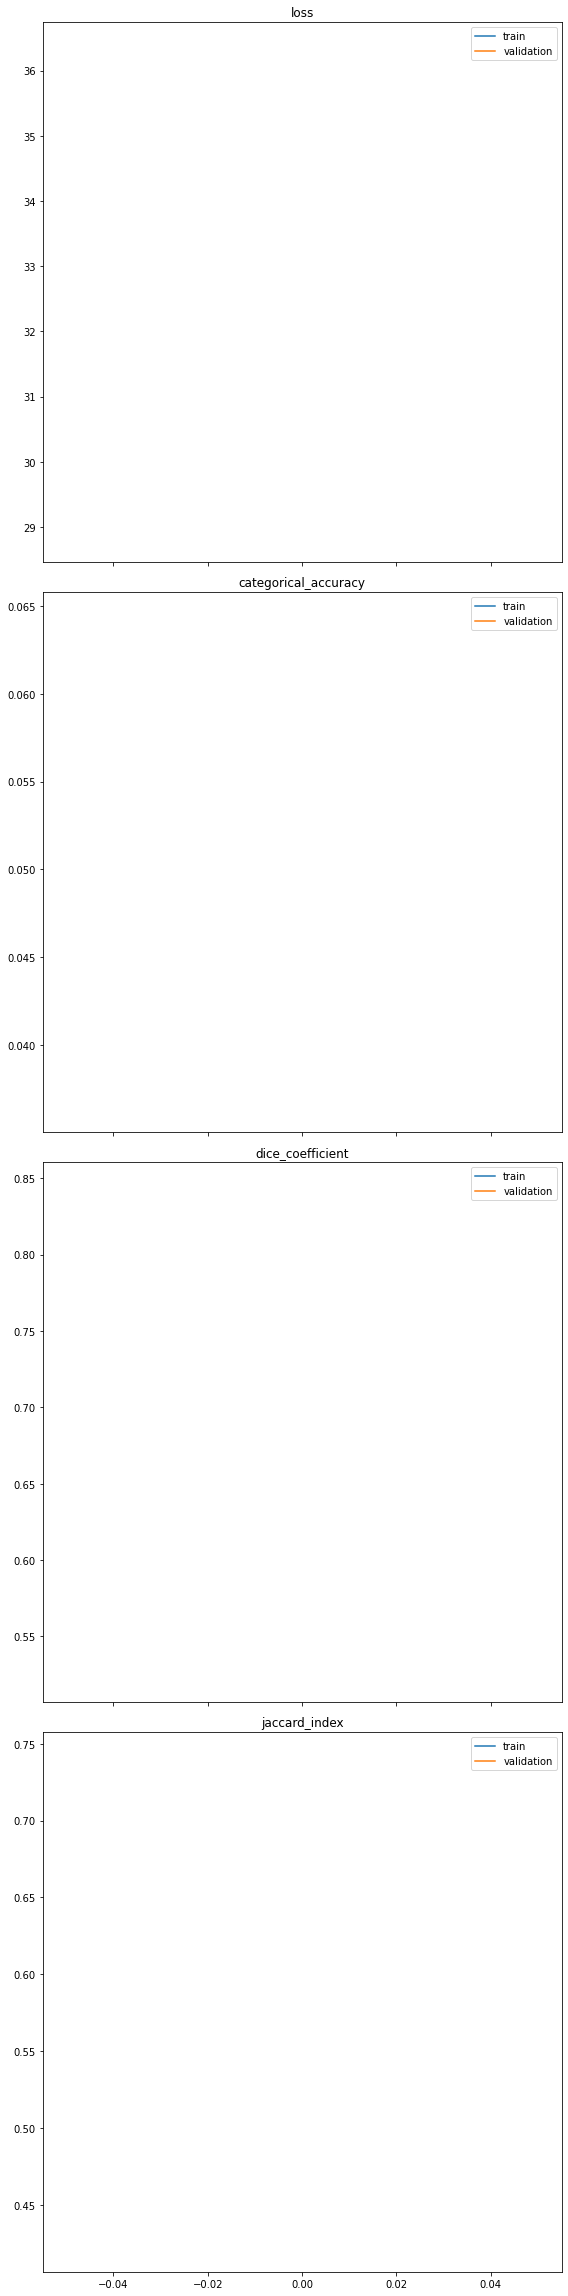

In [12]:
trainer = Trainer()
history = trainer.fit(unet, train, val = val, batch_size = batch_size, epochs = epochs)

In [13]:
predicted = unet.predict(test.batch(batch_size))

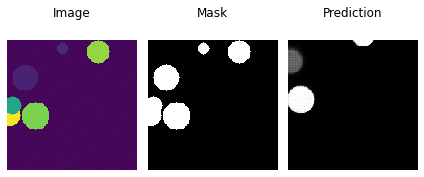

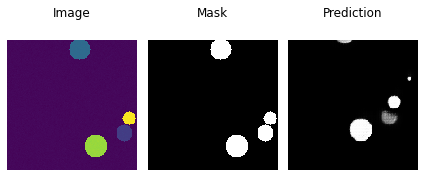

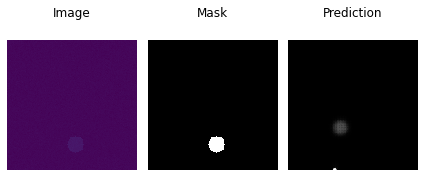

In [14]:
for i, (image, mask) in enumerate(test.take(n_samples)):
    segplot(image, mask, predicted[i])

(<Figure size 432x288 with 4 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'categorical_accuracy'}>,
        <AxesSubplot:title={'center':'dice_coefficient'}>,
        <AxesSubplot:title={'center':'jaccard_index'}>], dtype=object))

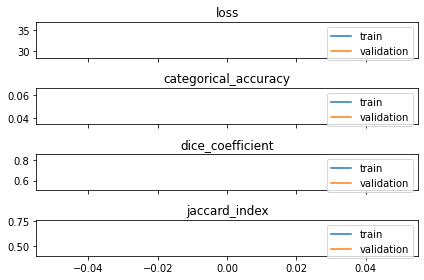

In [15]:
history_plot(history)